# Übung Punkte einer *DataFrame* zufällig verschieben

Jetzt wo wir wissen, wie man einen einzelnen Punkt zufällig verschiebt können wir unsere *Function* auf die richtigen Daten, die Zeckenstiche, anwenden. Die ist Schritt 2 in unserem Schema:

- Schritt 1: Einen Einzelpunkt zufällig verschieben ✓
- **Schritt 2: Alle Punkte einer DataFrame zufällig verschieben (1 "Run")**
- Schritt 3: Alle Punkte einer DataFrame mehrfach zufällig verschieben (z.B. 50 "Runs")
- Schritt 4: Anteil der Punkte im Wald pro "Run" ermitteln
- Schritt 5: Verteilung dieser Mittelwerte visualisieren 

Lade hierzu die nötigen Module und importiere die Zeckenstichdaten

In [ ]:
from myst_nb import glue

In [26]:
import pandas as pd
import random

def offset_coordinate(old, distance = 100):
    new = old + random.normalvariate(0,distance)
    return new

# mit "head(10)" importiere ich nur die ersten 10 Einträge des CSV. So kann ich den Workflow erstmal an einem kleineren Datensatz testen.
zeckenstiche = pd.read_csv("zeckenstiche.csv").head(10)


zeckenstiche

,ID,accuracy,x,y
0,2550,439.128951,2681116,1250648
1,10437,301.748542,2681092,1250672
2,9174,301.748542,2681128,1250683
3,8773,301.748542,2681111,1250683
4,2764,301.748529,2681131,1250692
5,2513,301.748529,2681171,1250711
6,9185,301.748542,2681107,1250712
7,28521,301.748542,2681124,1250720
8,26745,301.748542,2681117,1250725
9,27391,301.748542,2681138,1250725


## Übung 1: Alle Zeckenstiche zufällig verschieben

Nun können wir die *Function* `offset_coordinate()` auf die gesamte Spalten `x` und `y` der *DataFrame* zeckenstiche anwenden. Nutze eckige Klammern um die entsprechende Spalte zu wählen.

In [62]:
# Musterlösung

offset_coordinate(zeckenstiche["x"], distance = 100)
offset_coordinate(zeckenstiche["y"], distance = 100)

0    2.681261e+06
1    2.681237e+06
2    2.681273e+06
3    2.681256e+06
4    2.681276e+06
5    2.681316e+06
6    2.681252e+06
7    2.681269e+06
8    2.681262e+06
9    2.681283e+06
Name: x, dtype: float64

## Übung 2: Neue GeoDataFrame mit simulierten Punkten erstellen

Um die neuen, verschobenen Koordianten abzuspeichern erstellen wir zuerst eine neue, leere DataFrame (z.B. `zeckenstiche_sim`) und fügen den Output als neue Spalten dieser *DataFrame* hinzu. Auch die "ID" könnt ihr als neue Spalte hinzufügen, so behalten wir den Bezug zum ursprünglichen Datensatz.

In [63]:
# Musterlösung

zeckenstiche_sim = pd.DataFrame()

zeckenstiche_sim["ID"] = zeckenstiche["ID"]

zeckenstiche_sim["x"] = offset_coordinate(zeckenstiche["x"], distance = 100)
zeckenstiche_sim["y"] = offset_coordinate(zeckenstiche["x"], distance = 100)
zeckenstiche_sim

,ID,x,y
0,2550,2.681022e+06,2.681025e+06
1,10437,2.680998e+06,2.681001e+06
2,9174,2.681034e+06,2.681037e+06
3,8773,2.681017e+06,2.681020e+06
4,2764,2.681037e+06,2.681040e+06
5,2513,2.681077e+06,2.681080e+06
6,9185,2.681013e+06,2.681016e+06
7,28521,2.681030e+06,2.681033e+06
8,26745,2.681023e+06,2.681026e+06
9,27391,2.681044e+06,2.681047e+06


## Übung 4: Mehrere *DataFrames* visualisieren

Um zwei *DataFrames* im gleichen Plot darzustellen, wird folgendermassen vorgegangen. Der erste Datensatz wird mit `.plot()` visualisiert, wobei der Output einer Variabel  (z.B. `basemap`)  zugewiesen wird. Danach wird der zweite Datensatz ebenfalls mit `.plot()` visualisiert, wobei auf den ersten Plot via dem Argument `ax` verwiesen wird.

<AxesSubplot:xlabel='x', ylabel='y'>

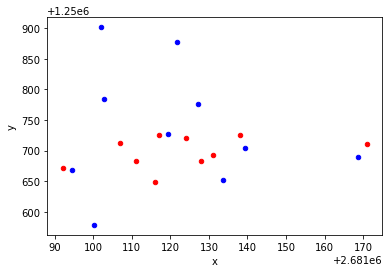

In [32]:
# Musterlösung

basemap = zeckenstiche.plot.scatter("x", "y", color = "red")
zeckenstiche_sim.plot.scatter("x", "y", ax = basemap, color = "blue")

Bei den roten Punkten handelt es sich um die Original-Zeckenstichen, bei den blauen um die simulierten (leicht verschobnen) Zeckenstiche.

## Übung 5: Genauigkeitsangaben der Punkte mitberücksichtigen.

Bisher haben wir alle Punkte um die gleiche Distanz verschoben. Wenn wir unsere *DataFrame* "zeckensiche" genau anschauen, steht uns eine Genauigkeitsangabe pro Punkt zur Verfügung: Die Spalte "accuracy". 

In [65]:
zeckenstiche

,ID,accuracy,x,y
0,2550,439.128951,2681116,1250648
1,10437,301.748542,2681092,1250672
2,9174,301.748542,2681128,1250683
3,8773,301.748542,2681111,1250683
4,2764,301.748529,2681131,1250692
5,2513,301.748529,2681171,1250711
6,9185,301.748542,2681107,1250712
7,28521,301.748542,2681124,1250720
8,26745,301.748542,2681117,1250725
9,27391,301.748542,2681138,1250725


Diese Spalte sagt was darüber aus, wie sicher der/die Nutzer\*in bei der Standortsangabe war. Wir können diese Angabe auch nutzen um den offset *pro Punkt* festzulegen.

In [68]:
zeckenstiche_sim["x"] = offset_coordinate(zeckenstiche["x"], distance = zeckenstiche["accuracy"])

zeckenstiche_sim["y"] = offset_coordinate(zeckenstiche["y"], distance = zeckenstiche["accuracy"])

zeckenstiche_sim

,ID,x,y
0,2550,2.680391e+06,1.250570e+06
1,10437,2.680594e+06,1.250619e+06
2,9174,2.680630e+06,1.250630e+06
3,8773,2.680613e+06,1.250630e+06
4,2764,2.680633e+06,1.250639e+06
5,2513,2.680673e+06,1.250658e+06
6,9185,2.680609e+06,1.250659e+06
7,28521,2.680626e+06,1.250667e+06
8,26745,2.680619e+06,1.250672e+06
9,27391,2.680640e+06,1.250672e+06
